## Stock Price Prediction

**Predicting the stock market is one of the most important applications of Machine Learning in finance. Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another.Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence.**

****Let’s see how to predict stock prices using Machine Learning and the python programming language. I will start this task by importing all the necessary python libraries that we need for this task****

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Loading the data

data = pd.read_csv('stock.csv')
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [3]:
# Check data types in columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [4]:
# Get descriptive statistics summary of the dataset

data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [5]:
# Display features in data set

data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

### Select Subset with relevant features

We use the daily closing price **Close** as the value to predict, so we can discard the other features.  

* 'Close' column has numerical data type
* The 'Date' is the index column and contains datetime values

In [6]:
## Create a new data frame with only closing price and date

df = pd.DataFrame(data, columns=['Date','Close'])

In [7]:
df = df.reset_index()

In [8]:
df.head()

,index,Date,Close
0,0,2009-03-09,25.59
1,1,2009-03-10,26.87
2,2,2009-03-11,26.64
3,3,2009-03-12,26.18
4,4,2009-03-13,25.73


In [9]:
# Check for missing values in the columns

df.isnull().values.any()

False

### Explore the data

When we take a look at the price movement over time by simply plotting the *Closing price* vs *Time*, we can already see, that the price continously increases over time and we can also estimate that trend could be linear.

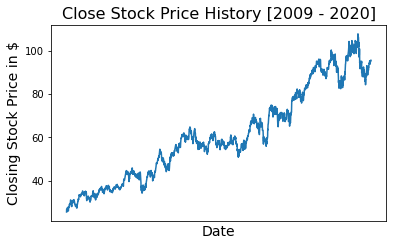

In [10]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Training a linear regression model

### Train Test Split

In [11]:
# import package for splitting dataset

from sklearn.model_selection import train_test_split

In [12]:
# Split data into train and test set

train,test=train_test_split(df,test_size=0.20,random_state=0)

### Create and train the model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Reshape index column inro 2D Array for .fit() method

X_train = np.array(train.index).reshape(-1,1)
y_train = train['Close']

In [15]:
# Create LinearRegression Object

model = LinearRegression()

# Fit the linear model using train data set

model.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [16]:
# The coefficient

print("The coefficient of Slope:", np.asscalar((model.coef_)))
print("The intercept : ", model.intercept_)

The coefficient of Slope: 0.027694692379214826
The intercept :  25.73326152349467


<ipython-input-16-77e3fb5e0cc3>:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print("The coefficient of Slope:", np.asscalar((model.coef_)))


Interpreting the coefficients:

* The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** increases by 0.0276 $
* The **intercept** coefficient is the price at wich the **closing price** measurement started, the stock price value at date zero

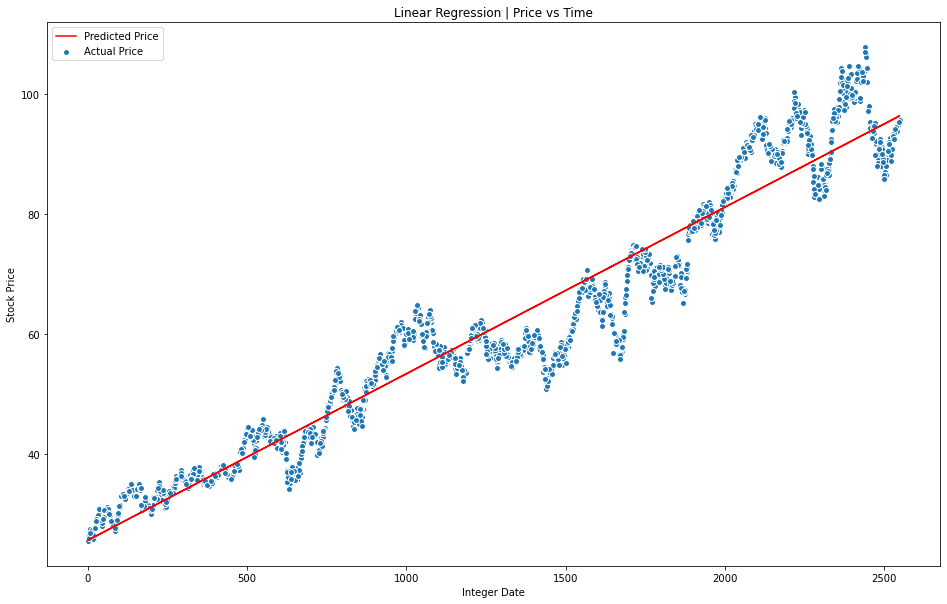

In [17]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Prediction of our model

In [19]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred

array([41.18689987, 36.53419155, 44.17792665, 60.73935269, 89.23719115,
       36.39571809, 93.08675339, 29.47204499, 45.89499758, 44.75951519,
       89.59722215, 36.86652786, 30.77369554, 53.7879849 , 60.04698538,
       70.10015871, 59.65925969, 64.64430432, 69.51857018, 66.47215401,
       71.45719864, 41.85157249, 66.00134424, 46.39350204, 60.18545884,
       90.26189477, 56.6959276 , 42.26699287, 76.99613712, 55.36658237,
       57.22212676, 77.99314604, 79.29479658, 77.16230527, 59.43770215,
       89.12641238, 31.05064246, 49.02449781, 45.39649311, 45.42418781,
       86.05230153, 72.3434288 , 93.69603662, 52.95714413, 47.75054196,
       88.04631938, 26.64718637, 39.02671387, 88.57251853, 41.8238778 ,
       52.62480782, 79.07323905, 28.97354053, 60.13006946, 73.22965895,
       72.06648187, 44.67643111, 45.86730288, 95.08077124, 71.9833978 ,
       27.20108022, 95.35771816, 71.56797741, 72.89732265, 51.93244051,
       49.57839166, 56.64053822, 76.71919019, 54.95116198, 58.13

### Regression Evaluation

#### Let's have a look at how the predicted values compare with the actual value on random sample from our data set.

In [22]:
# Get number of rows in data set for random sample

df.shape

(2550, 3)

In [23]:
# Generate 25 random numbers

randints = np.random.randint(25550,size=25)

df_sample = df[df.index.isin(randints)]

In [24]:
df_sample.head()

,index,Date,Close
294,294,2010-04-27,36.85
401,401,2010-09-23,36.64
1036,1036,2013-03-19,64.25
1089,1089,2013-06-05,57.20
1975,1975,2016-11-23,79.70


In [25]:
df.head()

,index,Date,Close
0,0,2009-03-09,25.59
1,1,2009-03-10,26.87
2,2,2009-03-11,26.64
3,3,2009-03-12,26.18
4,4,2009-03-13,25.73


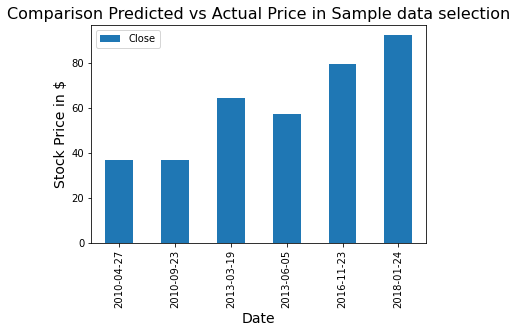

In [34]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

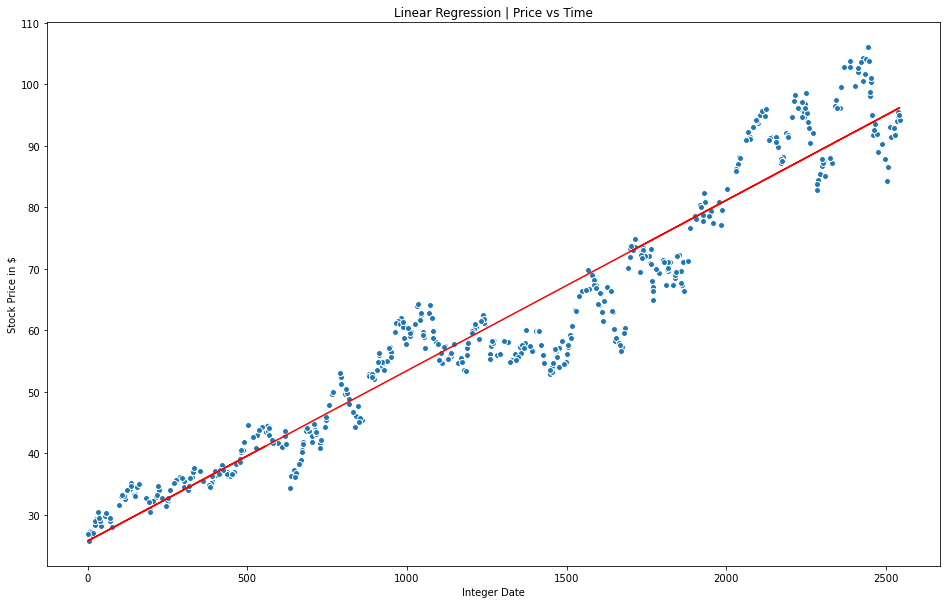

In [28]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

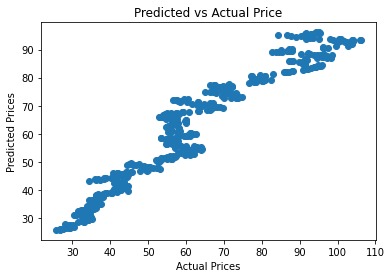

In [32]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

In [30]:
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [31]:
df.head()

,index,Date,Close,Prediction
0,0,2009-03-09,25.59,25.733262
1,1,2009-03-10,26.87,25.760956
2,2,2009-03-11,26.64,25.788651
3,3,2009-03-12,26.18,25.816346
4,4,2009-03-13,25.73,25.844040


In [35]:
from sklearn import metrics

In [36]:
df['Close'].describe()

count    2550.000000
mean       60.995955
std        21.097480
min        25.590000
25%        42.950000
50%        58.015000
75%        77.762500
max       107.800000
Name: Close, dtype: float64

In [37]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.3890511086027475
Mean Squared Error: 31.15102783151213
Root Mean Squared Error: 5.581310583681232


In [38]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9288438291715174


In [39]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9289105913810366